# Beurteilung der Datenqualität

Daten sind die Basis für jedes Machine Learning-Projekt. Daher ist die Beurteilung der Datenqualität am Anfang extrem wichtig. Nur so kannst du sicherstellen, dass die Ergebnisse auch wirklich belastbar sind.

Daten können nach unterschiedlichen Kriterien bewertet werden. Häufig wirst du dazu statistische Methoden nutzen, Korrelationen berechen oder einfach fehlende oder nicht aktuelle Daten erkennen.

## Statistik

In diesem Fall arbeitest du mit existierenden Daten, um die Methoden genauer kennenzulernen. Dazu nutzt du die Daten von Eurostat, der europäischen Statistikbehörde:

In [1]:
!pip install eurostat

Alle Statistikdaten haben bei Eurostat ein Kürzel. In diesem Beispiel beschäftigst du dich mit den *Hauspreisen*, diese tragen das Kürzel `prc_hpi_a`.  Eine genauere Erklärung findest du [hier](https://ec.europa.eu/eurostat/cache/metadata/en/prc_hpi_inx_esms.htm). 

Das Herunterladen der Daten ist nun sehr einfach:

In [2]:
import eurostat
df = eurostat.get_data_df("prc_hpi_a")
df

,purchase,unit,geo\time,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005
0,DW_EXST,I10_A_AVG,AT,206.24,180.61,167.20,158.14,150.24,142.79,130.49,124.31,120.45,114.31,106.30,100.0,NaN,NaN,NaN,NaN,NaN
1,DW_EXST,I10_A_AVG,BE,136.37,126.86,121.75,116.79,113.70,109.93,107.48,106.82,106.88,106.53,104.08,100.0,95.85,96.09,91.41,83.86,75.16
2,DW_EXST,I10_A_AVG,BG,141.15,129.22,121.93,116.35,108.70,99.07,92.29,90.23,89.80,91.44,93.94,100.0,111.25,141.46,113.21,87.81,76.56
3,DW_EXST,I10_A_AVG,CY,93.85,93.99,93.87,92.93,92.65,91.34,91.93,93.43,92.80,97.05,101.61,100.0,NaN,NaN,NaN,NaN,NaN
4,DW_EXST,I10_A_AVG,CZ,193.50,161.20,148.90,136.30,126.00,113.10,105.40,101.40,98.90,99.00,100.30,100.0,101.60,106.80,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,TOTAL,RCH_A_AVG,SE,10.20,4.20,2.50,-0.90,6.60,8.20,13.10,9.40,5.20,1.30,2.60,7.9,3.10,1.10,12.40,12.30,NaN
278,TOTAL,RCH_A_AVG,SI,11.50,4.60,6.70,8.70,8.30,3.30,0.80,-6.60,-5.20,-6.90,2.70,0.1,-9.50,7.00,NaN,NaN,NaN
279,TOTAL,RCH_A_AVG,SK,6.40,9.60,9.10,7.40,5.90,6.70,5.40,1.40,0.90,-2.70,-1.50,-4.0,-12.80,17.90,29.00,NaN,NaN
280,TOTAL,RCH_A_AVG,TR,39.80,24.80,5.40,6.90,10.20,13.30,16.10,13.60,11.40,9.50,6.90,NaN,NaN,NaN,NaN,NaN,NaN


Darin sind jede Menge Einzeldaten enthalten. Du interessierst dich für den Index der Hauspreise, bei dem als Grundlage da Jahr 2010 verwendet wurde und dort für die neuen Häuser:

In [3]:
hp10 = df[(df["unit"] == "I10_A_AVG") & (df["purchase"] == "DW_NEW")].copy()
hp10

,purchase,unit,geo\time,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005
89,DW_NEW,I10_A_AVG,AT,177.47,165.38,155.25,146.47,141.87,133.90,129.00,123.11,117.40,112.73,106.03,100.0,NaN,NaN,NaN,NaN,NaN
90,DW_NEW,I10_A_AVG,BE,143.56,135.06,129.31,125.44,121.57,116.59,112.66,107.50,109.82,105.86,103.92,100.0,100.02,101.10,98.66,94.44,90.04
91,DW_NEW,I10_A_AVG,BG,146.39,135.91,133.03,122.66,116.02,108.73,102.18,98.73,95.99,98.69,98.96,100.0,111.97,126.90,101.56,78.77,68.68
92,DW_NEW,I10_A_AVG,CY,92.31,96.51,96.88,92.58,90.36,88.23,87.68,88.92,91.21,95.01,97.36,100.0,NaN,NaN,NaN,NaN,NaN
93,DW_NEW,I10_A_AVG,CZ,193.40,163.30,149.70,138.80,124.10,108.90,102.90,98.10,96.40,96.40,98.50,100.0,103.10,99.80,NaN,NaN,NaN
94,DW_NEW,I10_A_AVG,DE,169.20,156.00,147.00,142.30,133.70,127.90,119.60,113.40,109.40,108.10,105.10,100.0,97.70,92.70,90.20,88.40,89.30
95,DW_NEW,I10_A_AVG,DK,265.51,255.12,253.25,251.44,247.03,245.46,247.02,221.19,198.01,125.05,112.60,100.0,101.35,109.70,117.32,103.08,78.28
96,DW_NEW,I10_A_AVG,EE,282.93,251.05,229.15,213.58,196.44,186.78,177.33,159.59,132.75,121.75,109.44,100.0,91.09,138.98,150.78,111.53,83.38
97,DW_NEW,I10_A_AVG,ES,115.70,110.68,103.94,96.66,90.93,85.71,80.52,76.88,76.21,80.56,94.08,100.0,102.27,106.69,102.40,91.51,NaN
98,DW_NEW,I10_A_AVG,FI,134.77,128.53,125.66,122.77,119.21,116.08,114.00,112.79,111.64,109.31,104.21,100.0,98.39,NaN,NaN,NaN,NaN


Du kannst nun eine Zusammenfassung der Werte aufrufen:

In [4]:
hp10.describe()

,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005
count,28.000000,28.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.0,21.000000,19.000000,15.000000,12.00000,9.000000
mean,171.173214,155.122143,145.137931,137.442069,129.550345,122.265862,116.743793,111.649310,107.428621,104.390000,102.841724,100.0,101.509524,112.648947,111.110000,99.49500,85.334444
std,74.368578,53.666577,43.653376,41.202046,38.978394,36.679911,34.959596,30.808214,25.056426,15.031214,8.272978,0.0,5.491701,21.980001,23.543484,15.21926,9.647970
min,92.310000,96.510000,96.880000,89.980000,86.890000,85.710000,80.520000,74.040000,67.400000,72.860000,83.460000,100.0,91.090000,90.580000,86.980000,78.77000,68.680000
25%,126.262500,120.087500,115.890000,108.630000,102.990000,99.770000,95.370000,94.360000,93.510000,96.400000,97.970000,100.0,97.700000,99.790000,97.215000,90.25250,78.590000
50%,145.185000,136.340000,133.030000,125.400000,119.210000,112.170000,106.850000,101.850000,103.870000,101.500000,101.770000,100.0,100.020000,107.950000,105.250000,98.27000,83.540000
75%,195.897500,171.810000,161.060000,149.140000,141.870000,132.430000,126.760000,117.170000,114.180000,109.310000,105.640000,100.0,105.460000,113.910000,114.435000,105.51500,90.040000
max,455.830000,313.880000,253.250000,251.440000,247.030000,245.460000,247.020000,221.190000,198.010000,154.720000,133.580000,100.0,111.970000,175.300000,170.480000,131.48000,98.880000


Hier siehst du zuerst, dass die Werte auf das Jahr 2010 normiert wurden!

Wie du siehst, werden in den unterschiedlichen Spalten nicht immer gleich viel Werte angezeigt. Das liegt daran, dass nicht vorhandene Werte (`NaN` für *not a number*) dort nicht mitgezählt werden. 2005 fehlen also noch viele Werte! Das muss du unbedingt beachten, wenn du die Daten analysierst.

Möchtest du nur vollständige Datensätze betrachten, kannst du `.dropna()` verwenden:

In [5]:
hp10.dropna()

,purchase,unit,geo\time,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005
90,DW_NEW,I10_A_AVG,BE,143.56,135.06,129.31,125.44,121.57,116.59,112.66,107.50,109.82,105.86,103.92,100.0,100.02,101.10,98.66,94.44,90.04
91,DW_NEW,I10_A_AVG,BG,146.39,135.91,133.03,122.66,116.02,108.73,102.18,98.73,95.99,98.69,98.96,100.0,111.97,126.90,101.56,78.77,68.68
94,DW_NEW,I10_A_AVG,DE,169.20,156.00,147.00,142.30,133.70,127.90,119.60,113.40,109.40,108.10,105.10,100.0,97.70,92.70,90.20,88.40,89.30
95,DW_NEW,I10_A_AVG,DK,265.51,255.12,253.25,251.44,247.03,245.46,247.02,221.19,198.01,125.05,112.60,100.0,101.35,109.70,117.32,103.08,78.28
96,DW_NEW,I10_A_AVG,EE,282.93,251.05,229.15,213.58,196.44,186.78,177.33,159.59,132.75,121.75,109.44,100.0,91.09,138.98,150.78,111.53,83.38
99,DW_NEW,I10_A_AVG,FR,128.02,122.38,118.78,114.64,111.83,107.58,105.77,104.01,103.87,104.27,104.86,100.0,97.38,97.19,95.77,90.87,83.54
108,DW_NEW,I10_A_AVG,NL,161.21,141.53,132.35,120.28,107.00,99.77,95.37,88.99,88.95,91.96,99.96,100.0,99.24,108.44,109.23,102.10,98.88
113,DW_NEW,I10_A_AVG,SE,145.38,143.54,145.77,139.21,126.91,119.50,112.53,110.05,106.87,108.03,105.64,100.0,96.25,90.58,86.98,81.41,78.59


Wie du siehst, hat sich die Datenmenge dadurch enorm reduziert. Das kann eine sinnvolle Einschränkung sein, muss aber nicht immer die richtige Lösung sein. Du kannst das `.dropna()` auch nur für bestimmte Spalten verwenden. Wenn du also nur vollständige Daten möchtest, die sich auf die Jahre 2010-2021 beziehen:

In [6]:
columns = list(range(2010,2022))
hp10.dropna(subset=columns)

,purchase,unit,geo\time,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005
89,DW_NEW,I10_A_AVG,AT,177.47,165.38,155.25,146.47,141.87,133.90,129.00,123.11,117.40,112.73,106.03,100.0,NaN,NaN,NaN,NaN,NaN
90,DW_NEW,I10_A_AVG,BE,143.56,135.06,129.31,125.44,121.57,116.59,112.66,107.50,109.82,105.86,103.92,100.0,100.02,101.10,98.66,94.44,90.04
91,DW_NEW,I10_A_AVG,BG,146.39,135.91,133.03,122.66,116.02,108.73,102.18,98.73,95.99,98.69,98.96,100.0,111.97,126.90,101.56,78.77,68.68
92,DW_NEW,I10_A_AVG,CY,92.31,96.51,96.88,92.58,90.36,88.23,87.68,88.92,91.21,95.01,97.36,100.0,NaN,NaN,NaN,NaN,NaN
93,DW_NEW,I10_A_AVG,CZ,193.40,163.30,149.70,138.80,124.10,108.90,102.90,98.10,96.40,96.40,98.50,100.0,103.10,99.80,NaN,NaN,NaN
94,DW_NEW,I10_A_AVG,DE,169.20,156.00,147.00,142.30,133.70,127.90,119.60,113.40,109.40,108.10,105.10,100.0,97.70,92.70,90.20,88.40,89.30
95,DW_NEW,I10_A_AVG,DK,265.51,255.12,253.25,251.44,247.03,245.46,247.02,221.19,198.01,125.05,112.60,100.0,101.35,109.70,117.32,103.08,78.28
96,DW_NEW,I10_A_AVG,EE,282.93,251.05,229.15,213.58,196.44,186.78,177.33,159.59,132.75,121.75,109.44,100.0,91.09,138.98,150.78,111.53,83.38
97,DW_NEW,I10_A_AVG,ES,115.70,110.68,103.94,96.66,90.93,85.71,80.52,76.88,76.21,80.56,94.08,100.0,102.27,106.69,102.40,91.51,NaN
98,DW_NEW,I10_A_AVG,FI,134.77,128.53,125.66,122.77,119.21,116.08,114.00,112.79,111.64,109.31,104.21,100.0,98.39,NaN,NaN,NaN,NaN


Das sind jetzt wieder viel mehr Länder. Sinnvollerweise kannst du damit eine Analyse durchführen, die Daten genauer dieser Jahre enthält:

In [7]:
hp_from_2010 = hp10.dropna(subset=columns)[["geo\\time"] + columns]
hp_from_2010

,geo\time,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
89,AT,100.0,106.03,112.73,117.40,123.11,129.00,133.90,141.87,146.47,155.25,165.38,177.47
90,BE,100.0,103.92,105.86,109.82,107.50,112.66,116.59,121.57,125.44,129.31,135.06,143.56
91,BG,100.0,98.96,98.69,95.99,98.73,102.18,108.73,116.02,122.66,133.03,135.91,146.39
92,CY,100.0,97.36,95.01,91.21,88.92,87.68,88.23,90.36,92.58,96.88,96.51,92.31
93,CZ,100.0,98.50,96.40,96.40,98.10,102.90,108.90,124.10,138.80,149.70,163.30,193.40
94,DE,100.0,105.10,108.10,109.40,113.40,119.60,127.90,133.70,142.30,147.00,156.00,169.20
95,DK,100.0,112.60,125.05,198.01,221.19,247.02,245.46,247.03,251.44,253.25,255.12,265.51
96,EE,100.0,109.44,121.75,132.75,159.59,177.33,186.78,196.44,213.58,229.15,251.05,282.93
97,ES,100.0,94.08,80.56,76.21,76.88,80.52,85.71,90.93,96.66,103.94,110.68,115.70
98,FI,100.0,104.21,109.31,111.64,112.79,114.00,116.08,119.21,122.77,125.66,128.53,134.77


### Datenstruktur anpassen

Für die weitere Analyse ist es sinnvoll, die Datenstruktur etwas anzupassen. So ist `geo\time` eine etwas unglückliche Bezeichnung, hier ist nur das Land gemeint, das kannst du einfach umbenennen:

In [8]:
hp_from_2010.rename(columns={"geo\\time": "country"}, inplace=True)
hp10.rename(columns={"geo\\time": "country"}, inplace=True)

### Zeitreihen

Nun kannst du dir die Immobilienpreisentwicklung in Deutschland anschauen:

In [9]:
hp10[hp10["country"] == "DE"]

,purchase,unit,country,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005
94,DW_NEW,I10_A_AVG,DE,169.2,156.0,147.0,142.3,133.7,127.9,119.6,113.4,109.4,108.1,105.1,100.0,97.7,92.7,90.2,88.4,89.3


`94` ist dabei die ursprüngliche Zeile im `DataFrame`.

Für die Visualisierung betrachtest du nur die Jahre als Spalten und transponierst das Ergebnis:

<AxesSubplot:>

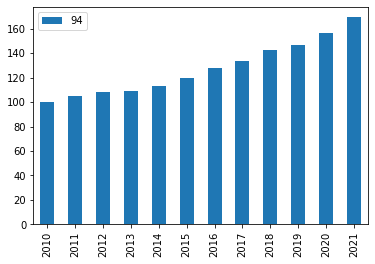

In [10]:
hp10[hp10["country"] == "DE"][[i for i in range(2010, 2022)]].T.plot.bar()

### Zeitreihen vieler Daten

Dafür betrachtest du die saisonjustierten Daten zu einem bestimmten Zeitpunkt, allerdings für alle Länder gleichzeitig. Die `pivot`-Funktion kennst du schon, die ist hier sehr nützlich:

<AxesSubplot:>

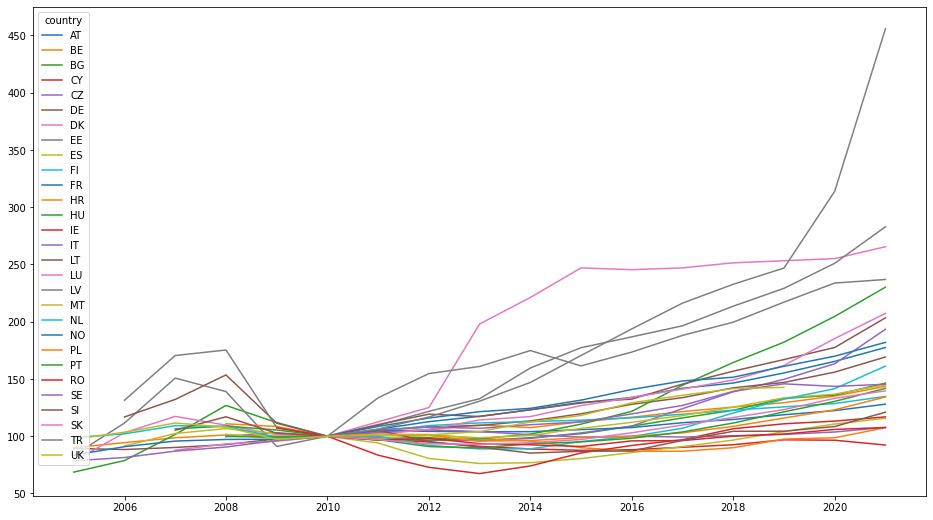

In [11]:
country_prices = hp10[["country"]+list(range(2005,2022))].set_index("country")
country_prices.T.plot(figsize=(16,9))

Das ist etwas unübersichtlich und die fehlenden Daten kannst du gar nicht gut erkennen. Auch ist es schwierig, das Land mit dem "Boom" eindeutig zu identifizieren.

Manchmal ist eine *qualitative Darstellung* dafür besser geeignet.

<AxesSubplot:ylabel='country'>

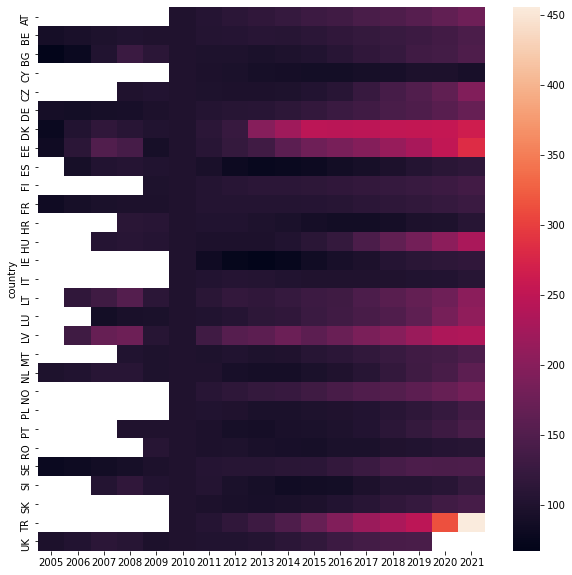

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
sns.heatmap(country_prices)

Das ist viel besser, um Fehler oder Ausreißer zu erkennen. Offenbar ist in der Türkei der Markt explodiert, während in UK keine Daten mehr für 2020 bereitgestellt werden. Auch die ersten Datenpunkte für die Länder kannst du auf einen Blick erkennen!

### Korrelation der Daten

Nun betrachtest du die Hauspreise zueinander. Oftmals wirst du es mit Größen zu tun haben, die gar nicht unabhängig voneinander sind. Um das zu ermitteln, gibt es in Python und `pandas` leistungsfähige Funktionen.

Bestimmt hängen die Hauspreise in Deutschland und Österreich eng zusammen. das kannst du grafisch über einen sog. *Pairplot* ermitteln:

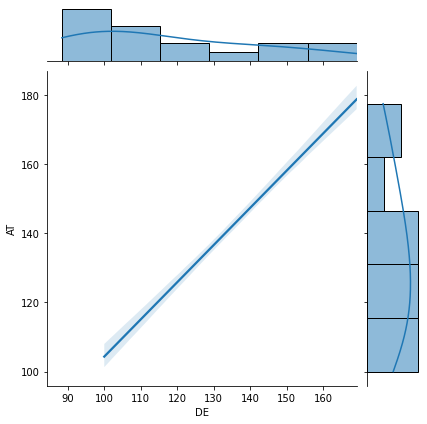

In [13]:
sns.jointplot(x=country_prices.T["DE"], y=country_prices.T["AT"], scatter=False, kind="reg")

Den Zusammenhang kannst du auf den ersten Blick erkennen! In Österreich war die Steigerungsrate etwas größer.

Mit anderen Ländern wird das sicher anders aussehen, schau dir zum Vergleich noch die Türkei an:

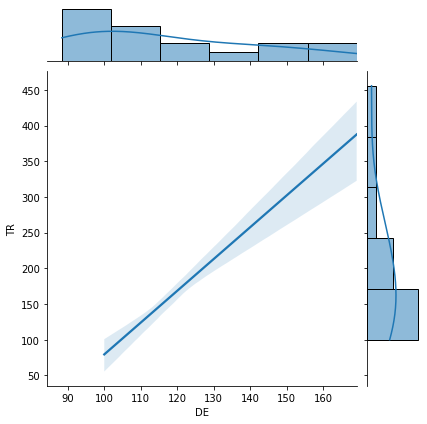

In [14]:
sns.jointplot(x=country_prices.T["DE"], y=country_prices.T["TR"], scatter=False, kind="reg")

Auch diese Preise sind sehr stark voneinander abhängig. In der Türkei gab es eine massive Preissteigerung, die aber proportional zur deutschen ist.

Mithilfe des sog. Pearson-Koeffizienten kannst du ermitteln, wie stark die Daten korreliert sind:

In [15]:
country_prices.T[["DE", "AT", "TR"]].corr()

country,DE,AT,TR
country,,,
DE,1.000000,0.992932,0.961625
AT,0.992932,1.000000,0.953359
TR,0.961625,0.953359,1.000000


Die Korrelation ist also mit Österreich nur minimal höher (1 steht für vollkommen korreliert, -1 für vollkommen antikorreliert, 0 für unkorreliert).

Mit solchen Daten muss du also vorsichtig sein, weil du nicht davon ausgehen kannst, dass diese unabhängig voneinander sind. Damit kannst du leicht in das sog. *Overfitting* kommen.

Wenn du dir einen grafischen Überblick über diese Länder verschaffen willst, kannst du dazu einen sog. *Pairplot* einsetzen:

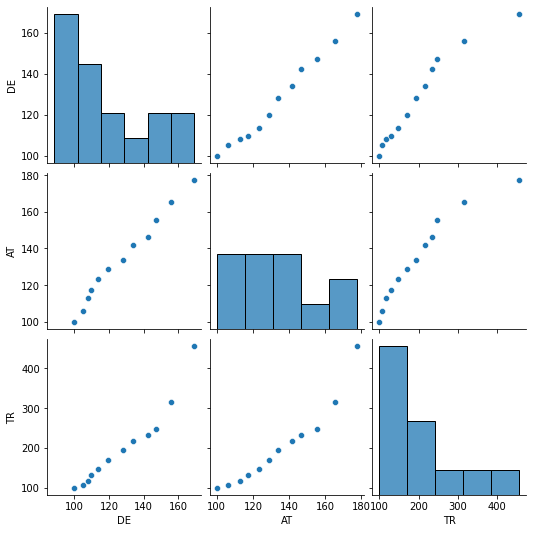

In [16]:
sns.pairplot(country_prices.T[["DE", "AT", "TR"]])

Hier siehst du noch etwas genauer die Zusammenhänge zwischen den Immobilienpreisen in den jeweiligen Ländern. Der lineare Zusammenhang ist ganz offensichtlich.

## Boxplots

Wie du in den oberen Grafiken erkennen kannst, variiert die Schwankungsbreite der Preise erheblich von Land zu Land. Auch diese kannst du dir grafisch anzeigen lassen, dazu dienen sog. *Boxplots*.

In [17]:
import pandas as pd
u = country_prices.melt(ignore_index=False, var_name="year", value_name="price_index")

<AxesSubplot:xlabel='price_index', ylabel='country'>

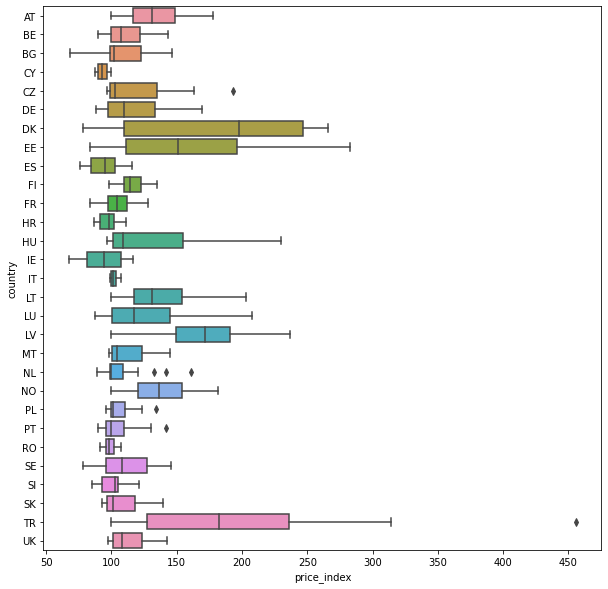

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
sns.boxplot(y = u.index, x = u["price_index"])

Hier kannst du viele interessante Details entdecken. So ist die Preisspanne in der Türkei bei weitem am höchsten. Auf der anderen Seite gibt es auch Länder, in denen zumindest einmal auch die Preise zurückgegangen sind (Niveau unter 100). In Irland ist das besonders ausgeprägt - bestimmt ein Effekt der Finanzkrise.

## Datenqualität und Statistik kann spannend sein

Auch wenn es etwas *trocken* klingt, kannst du die Untersuchung der Datenqualität mithilfe von aussagekräftigen Diagrammen richtig interessant gestalten. Oft wirst du in diesem Stadium schon interessante Einblicke haben, die es dir viel leichter machen, dich mit Machine Learning und Advanced Analytics zu beschäftigen.

Ab und zu hingegen kann es auch passieren, dass du die Daten als unbrauchbar erkennst. Und in vielen Fällen kannst du die Zwischenergebnisse bereits präsentieren und damit Aufmerksamkeit erregen.